In [27]:
"""
A customized CNN model
Use fashion mnist data arXiv:1708.07747, August 2017.
"""
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
from pytorch_utils.transform_utils import hv_flip
from pytortch_utils.cnn_model_frame import train_model

@article{DBLP:journals/corr/abs-1708-07747,
  author    = {Han Xiao and
               Kashif Rasul and
               Roland Vollgraf},
  title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
               Algorithms},
  journal   = {CoRR},
  volume    = {abs/1708.07747},
  year      = {2017},
  url       = {http://arxiv.org/abs/1708.07747},
  archivePrefix = {arXiv},
  eprint    = {1708.07747},
  timestamp = {Mon, 13 Aug 2018 16:47:27 +0200},
  biburl    = {https://dblp.org/rec/bib/journals/corr/abs-1708-07747},
  bibsource = {dblp computer science bibliography, https://dblp.org}
}


In [10]:
# load in train /test image
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# ensure to format correct type
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)


In [11]:
# let's train on the first 5000
train_images = train_images[:5000] / 255.0
train_labels = train_labels[:5000]

test_images = test_images / 255.0

train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

In [12]:
# split train/test data
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.batch(64)

In [14]:
x_train = Variable(torch.FloatTensor(train_images), requires_grad = True).view(len(train_images), 1,28,28)
y_train = Variable(torch.LongTensor(train_labels), requires_grad=False)
x_test = Variable(torch.FloatTensor(test_images), requires_grad = True).view(len(test_images), 1,28,28)
y_test = Variable(torch.LongTensor(test_labels), requires_grad=False)


In [34]:
data_train = CustomTensorDataset(tensors=(x_train, y_train), transform=hv_flip)
train_loader = torch.utils.data.DataLoader(data_train, batch_size=64, shuffle = True)


In [35]:
train_cnn_model = train_model(
    num_epoch=15,
    train_loader=train_loader,
    x_test=x_test,
    y_test=y_test,
)

[1/15] Train Loss: 0.829
Epoch 0 Valid Loss: 0.70355, Valid Acc: 73.20
[2/15] Train Loss: 0.542
Epoch 1 Valid Loss: 0.51771, Valid Acc: 80.36
[3/15] Train Loss: 0.484
Epoch 2 Valid Loss: 0.48415, Valid Acc: 82.07
[4/15] Train Loss: 0.446
Epoch 3 Valid Loss: 0.48642, Valid Acc: 82.03
[5/15] Train Loss: 0.400
Epoch 4 Valid Loss: 0.48097, Valid Acc: 82.50
[6/15] Train Loss: 0.360
Epoch 5 Valid Loss: 0.44186, Valid Acc: 84.15
[7/15] Train Loss: 0.346
Epoch 6 Valid Loss: 0.43216, Valid Acc: 84.81
[8/15] Train Loss: 0.303
Epoch 7 Valid Loss: 0.41300, Valid Acc: 85.66
[9/15] Train Loss: 0.292
Epoch 8 Valid Loss: 0.41918, Valid Acc: 85.35
[10/15] Train Loss: 0.283
Epoch 9 Valid Loss: 0.42603, Valid Acc: 85.82
[11/15] Train Loss: 0.278
Epoch 10 Valid Loss: 0.46661, Valid Acc: 84.21
[12/15] Train Loss: 0.262
Epoch 11 Valid Loss: 0.45657, Valid Acc: 83.79
[13/15] Train Loss: 0.253
Epoch 12 Valid Loss: 0.41387, Valid Acc: 85.88
[14/15] Train Loss: 0.234
Epoch 13 Valid Loss: 0.42154, Valid Acc: 86.

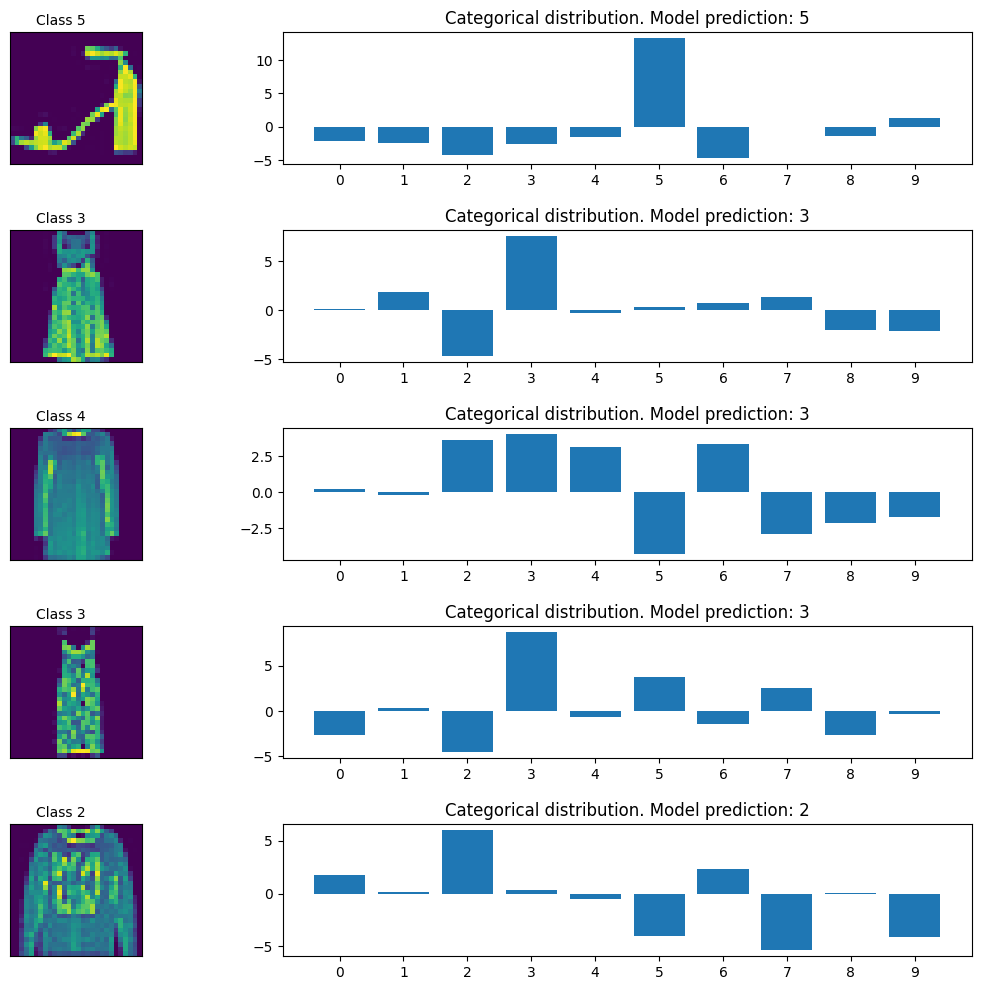

In [49]:
num_test_images = x_test.shape[0]

random_inx = [1200, 215, 150, 300, 500]
random_test_images = x_test[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

predictions = train_cnn_model(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image.detach().numpy()))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(5., -2., f'Class {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction.detach().numpy())
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    pred_inx = torch.argmax(prediction)
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {pred_inx}")
    
plt.show()
